 K - Means
 ==========

In [1]:
import pandas as pd #python package for data manipulation and analysis
import numpy as np #python package for numerical computing  
import matplotlib.pyplot as plt #python package for creating static, interactive, and animated visualizations
import seaborn as sns #python package for creating statistical graphics

# Read the Data Files


In [2]:
df = pd.read_csv('admission2_mod.csv') #train dataset

In [3]:
# converting the admit status into boolean
df['De']=df['De']=='admit'
df.head(5)

,GPA,GMAT,De
0,2.13,408,False
1,2.19,411,False
2,2.20,474,False
3,2.31,505,False
4,2.35,321,False


# Visualize the distribution of GPA and GMAT wrt De/admit

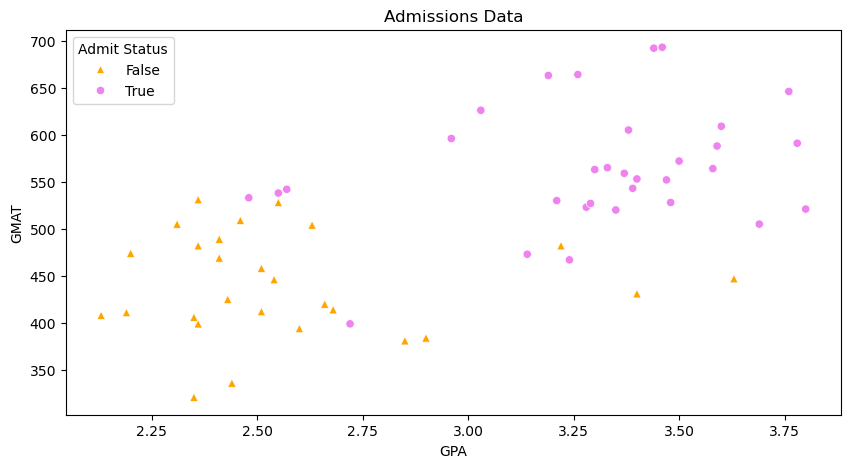

In [4]:
# Plotting admission data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='De', style='De', markers=['^', 'o'], palette=['orange', 'violet'])
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Admissions Data")
plt.legend(title='Admit Status')
plt.show()

# K-Means Clustering

* K-means clustering is a popular algorithm (*`unsupervised learning`*) used to partition a dataset into 
**K** distinct, non-overlapping subsets or clusters.
* The goal is to group data points in such a way that points in the same cluster are more similar to each other than to those in other clusters.
* Even though our dataset is `labelled`, Notice that while `using k-means`, we are `not using the label\target column` but we are `using the GPA and GMAT columns to find the narural groupings`.

We are going to cluster in two ways for number of clusters 2 & 3:
1. Without scaling 
2. With scaling (normalize data)


## K - Means Without Scaling

### K-Means: 2 Clusters

In [5]:
from sklearn.cluster import KMeans #libraray to perform K-means clustering

This code is performing two main operations:

1. First line creates and fits a K-means clustering model that:
   - Divides the data into 2 clusters (`n_clusters=2`)
   - Uses GPA and GMAT scores as features for clustering
   - Sets a random seed (`random_state=0`) to ensure the same results each time

2. Second line adds the clustering results to the dataframe by:
   - Creating a new column called 'Cluster'
   - Assigning each row a cluster label (0 or 1) based on which cluster the algorithm determined it belongs to

The overall purpose is to group students into two distinct clusters based on their GPA and GMAT scores, which could potentially reveal natural groupings in the admission data.


In [6]:
# Initialize K-means clustering model with 2 clusters and a fixed random state for reproducibility
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(df[['GPA', 'GMAT']]) # Fit model on GPA and GMAT columns

# Assign cluster labels (0 or 1) to each data point in the original dataframe
# These labels represent which cluster each student belongs to based on their GPA and GMAT scores
df['Cluster'] = kmeans2.labels_

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# to know the cluster means
kmeans2.cluster_centers_

array([[  3.2       , 567.29411765],
       [  2.6492    , 425.12      ]])

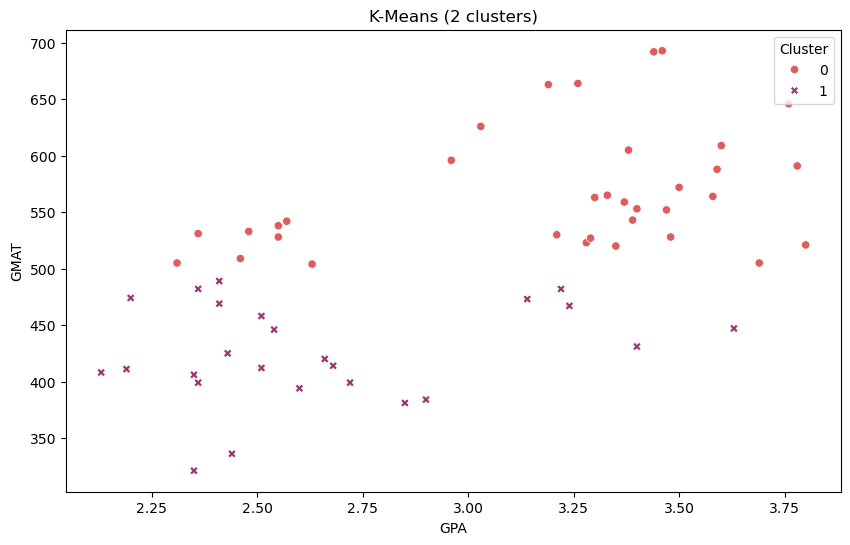

In [8]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='flare')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means (2 clusters)')
plt.legend(title='Cluster')
plt.show()

### K-Means: 3 Clusters


In [9]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(df[['GPA', 'GMAT']])
df['Cluster'] = kmeans3.labels_

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


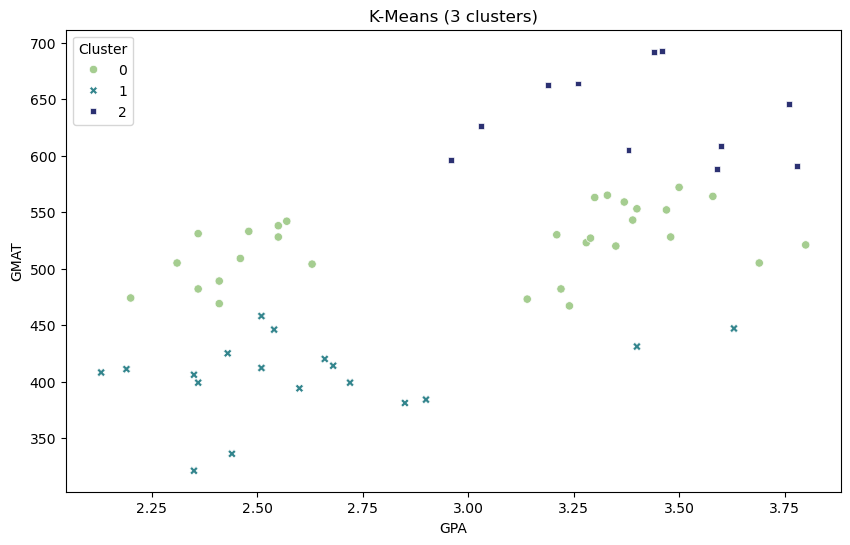

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='crest')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means (3 clusters)')
plt.legend(title='Cluster')
plt.show()

## K - Means With Scaling

**StandardScaler**
- Standardizes features by removing the mean and scaling to unit variance
- Important because K-means is sensitive to the scale of features

In [11]:
from sklearn.preprocessing import StandardScaler #library to normalize data

#### Data Preprocessing

Creating another dataframe with same values as dataframe inorder to preserve the original dataframe

In [12]:
# creating another dataframe with same values as dataframe inorder to preserve the original dataframe
df_norm = df.copy() #creates a copy of original dataframe

In [13]:
# Scale the features
scaler = StandardScaler()
df_norm[['GPA', 'GMAT']] = scaler.fit_transform(df_norm[['GPA', 'GMAT']])

### K - Means scaled with 2 clusters

In [14]:
# Create and fit K-means model on scaled data
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(df_norm[['GPA', 'GMAT']])

# Add cluster assignments
df_norm['Cluster'] = kmeans_2.labels_

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


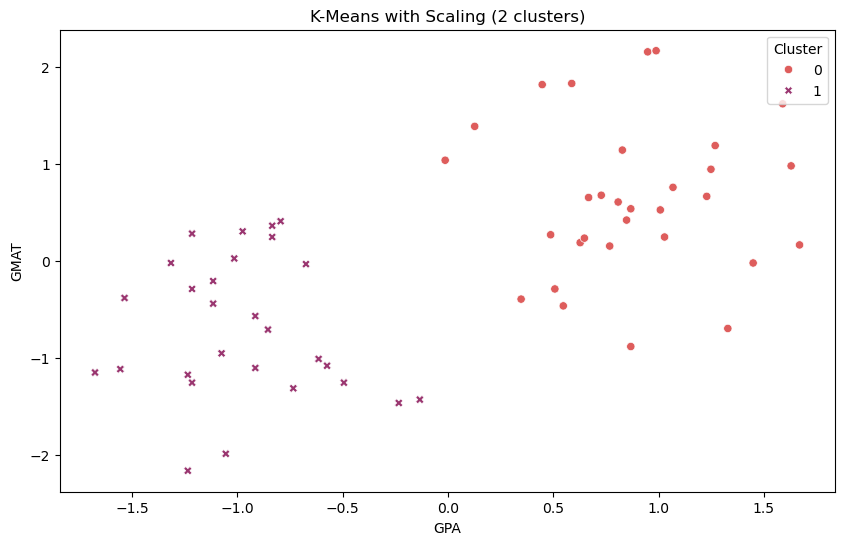

In [15]:
# plot to visulaise the K-means with 3 clusers on scaled data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_norm, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='flare')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means with Scaling (2 clusters)')
plt.legend(title='Cluster')
plt.show()

### K - Means scaled with 3 Clusters

In [16]:
# Creating a K-means model with 3 clusters on scaled data
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(df_norm[['GPA', 'GMAT']])
df_norm['Cluster'] = kmeans_3.labels_

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


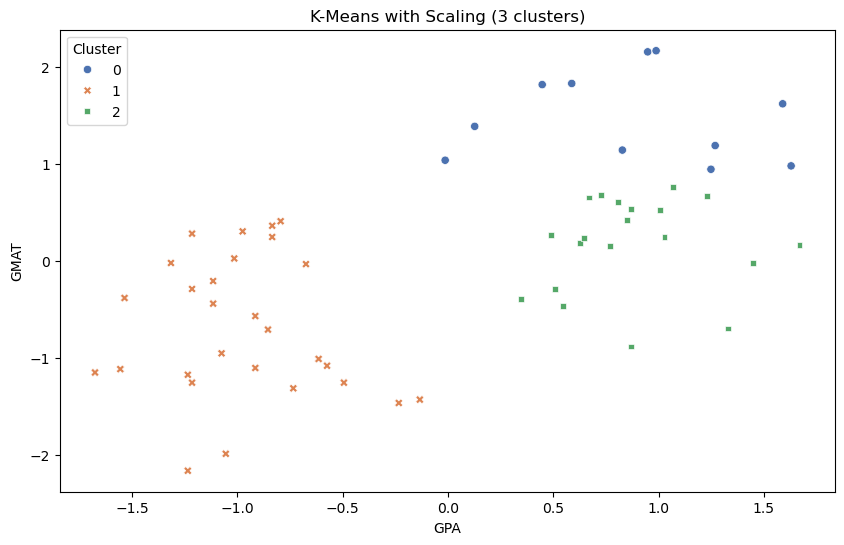

In [17]:
# plot to visulaise the K-means with 3 clusers on scaled data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_norm, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='deep')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means with Scaling (3 clusters)')
plt.legend(title='Cluster')
plt.show()